In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("../data/spxw_1dte_baseline_orders_02_11_2026.csv", header=0)
data = data.drop(columns=['Type', 'Tag', 'Status'])

data['Time'] = pd.to_datetime(data['Time'], utc=True)
data = data[data['Time'] > pd.Timestamp("2022-04-01", tz="UTC")]
data['Time'] = data['Time'].dt.tz_convert("America/New_York")

data = data.reset_index(drop=True)

mask = (data['Time'].dt.hour.isin([15])) & (data['Time'].dt.minute == 55)
data['entry'] = mask

data.head(20)

,Time,Symbol,Price,Quantity,Value,entry
0,2022-04-05 15:55:00-04:00,SPXW 220406P04430000,0.95,1,0.95,True
1,2022-04-05 15:55:00-04:00,SPXW 220406P04450000,1.55,-1,-1.55,True
2,2022-04-05 15:55:00-04:00,SPXW 220406C04600000,0.90,-1,-0.90,True
3,2022-04-05 15:55:00-04:00,SPXW 220406C04620000,0.40,1,0.40,True
4,2022-04-06 09:45:00-04:00,SPXW 220406P04450000,8.00,1,8.00,False
5,2022-04-06 09:45:00-04:00,SPXW 220406P04430000,3.60,-1,-3.60,False
6,2022-04-06 09:45:00-04:00,SPXW 220406C04600000,0.05,1,0.05,False
7,2022-04-06 09:45:00-04:00,SPXW 220406C04620000,0.25,-1,-0.25,False
8,2022-04-07 15:55:00-04:00,SPXW 220408P04415000,0.85,1,0.85,True
9,2022-04-07 15:55:00-04:00,SPXW 220408P04435000,1.65,-1,-1.65,True


In [18]:
order_totals = (data.sort_values('Time').groupby(['Time'])['Value'].sum() * -1).reset_index(name="value")
order_totals['trade'] = order_totals.index // 2
order_totals.head(20)

,Time,value,trade
0,2022-04-05 15:55:00-04:00,1.10,0
1,2022-04-06 09:45:00-04:00,-4.20,0
2,2022-04-07 15:55:00-04:00,1.40,1
3,2022-04-08 10:35:00-04:00,-0.50,1
4,2022-04-12 15:55:00-04:00,1.20,2
5,2022-04-13 09:35:00-04:00,-0.60,2
6,2022-04-13 15:55:00-04:00,1.40,3
7,2022-04-14 11:15:00-04:00,-0.60,3
8,2022-04-19 15:55:00-04:00,1.30,4
9,2022-04-20 09:45:00-04:00,-0.55,4


In [19]:
trade_totals = pd.DataFrame()
trade_totals['exit time'] = order_totals.groupby('trade')['Time'].max()
trade_totals['value'] = order_totals.groupby('trade')['value'].sum()
trade_totals['month'] = trade_totals['exit time'].dt.to_period("M")

trade_totals.head()

/var/folders/8_/wzdkmfn13sd6lvk4c6xz3cph0000gp/T/ipykernel_45721/1610312051.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trade_totals['month'] = trade_totals['exit time'].dt.to_period("M")


,exit time,value,month
trade,,,
0,2022-04-06 09:45:00-04:00,-3.10,2022-04
1,2022-04-08 10:35:00-04:00,0.90,2022-04
2,2022-04-13 09:35:00-04:00,0.60,2022-04
3,2022-04-14 11:15:00-04:00,0.80,2022-04
4,2022-04-20 09:45:00-04:00,0.75,2022-04


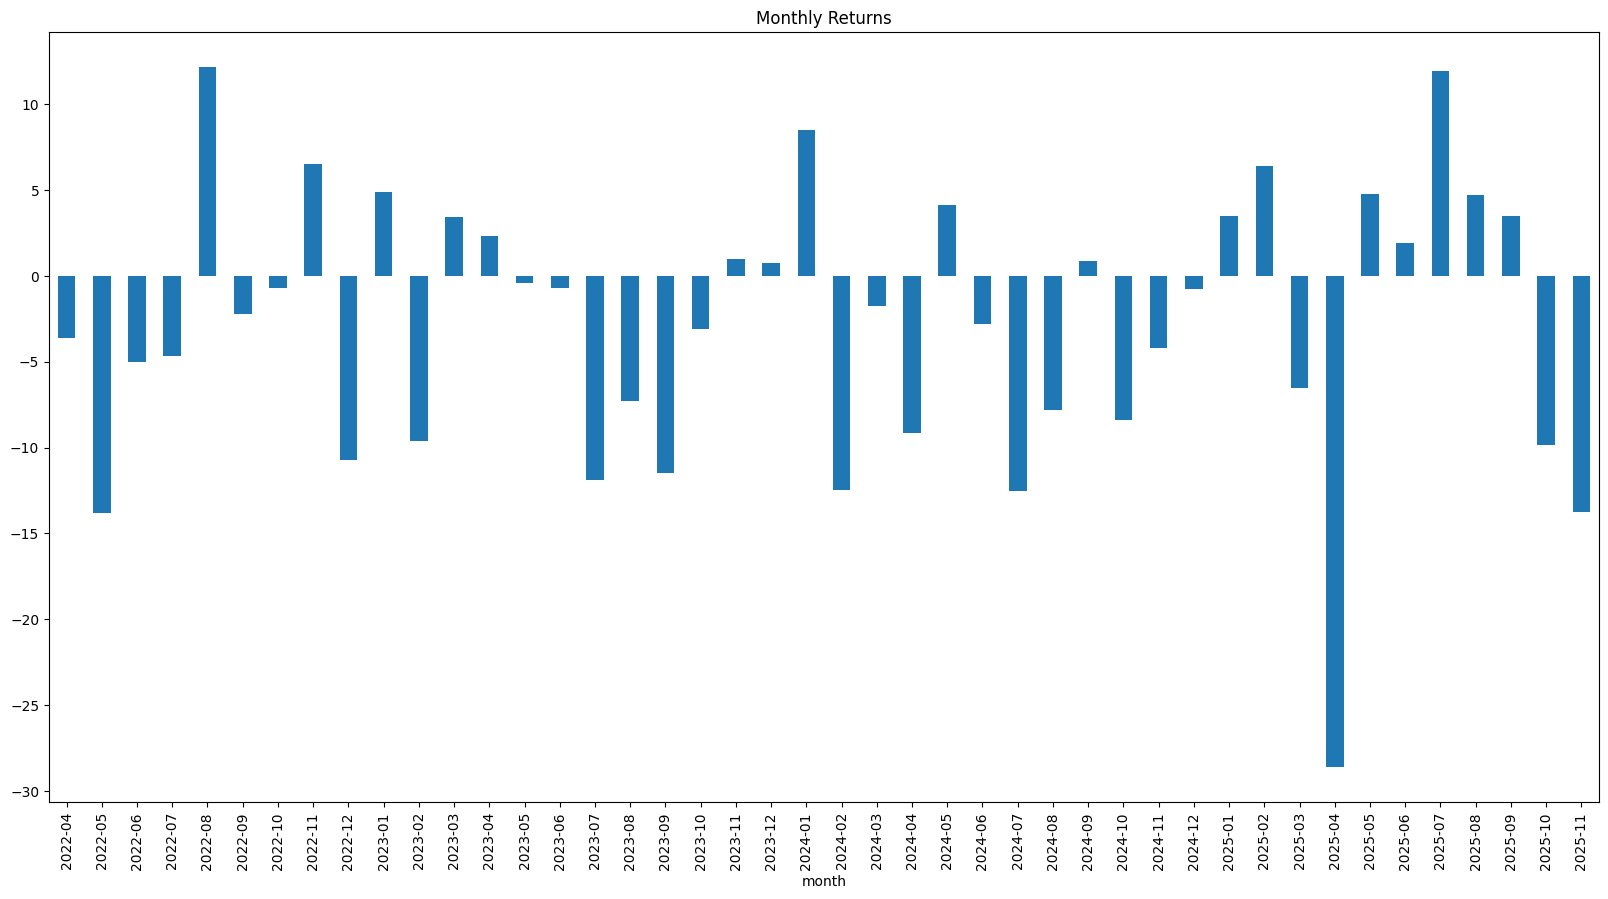

In [20]:
ax = trade_totals.groupby('month')['value'].sum().plot(kind='bar', figsize=(20,10), title='Monthly Returns')

In [21]:
print('mean return: ', trade_totals['value'].mean())
print('std return: ', trade_totals['value'].std())
print('median return: ', trade_totals['value'].median())

mean return:  -0.22882462686567165
std return:  2.143722484966574
median return:  0.7


In [22]:
wins = (trade_totals['value'] > 0.0).sum()
losses = (trade_totals['value'] <= 0.0).sum()

print('wins: ', wins)
print('losses: ', losses)
win_rate = wins / (wins + losses)
print('win rate: ', win_rate)

wins:  426
losses:  110
win rate:  0.7947761194029851


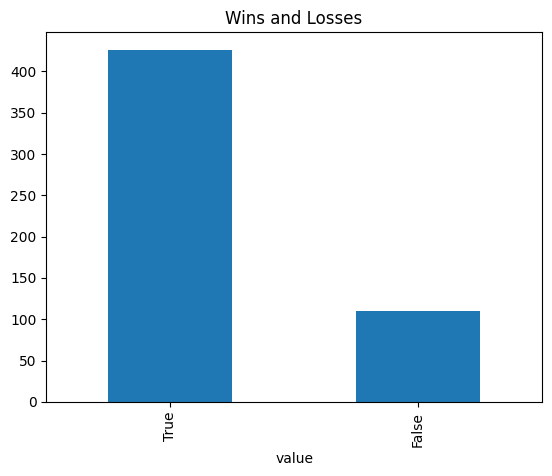

In [23]:
ax = trade_totals['value'].gt(0).value_counts().plot(kind='bar', title="Wins and Losses")

In [24]:
avg_win = trade_totals[trade_totals['value'] > 0]['value'].mean()
print('avg win: ', avg_win)
print('largest win: ', trade_totals['value'].max())
print('-----')
avg_loss = trade_totals[trade_totals['value'] <= 0]['value'].mean()
print('avg loss: ', avg_loss)
print('largest loss: ', trade_totals['value'].min())
print('---')
expectancy = (win_rate * avg_win) + ((1.0 - win_rate) * avg_loss)
print('expectancy: ', expectancy)

avg win:  0.7435446009389671
largest win:  1.7000000000000002
-----
avg loss:  -3.994545454545454
largest loss:  -10.0
---
expectancy:  -0.2288246268656715


In [25]:
print('skew: ', trade_totals['value'].skew())
print('kurt: ', trade_totals['value'].kurt())

skew:  -2.0624986620954515
kurt:  3.2709136313698624


Text(0.5, 1.0, 'Losses')

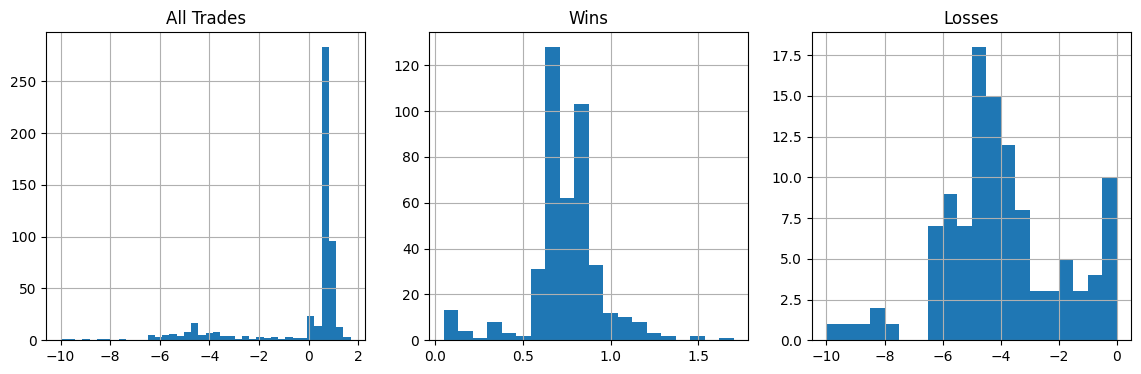

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

trade_totals['value'].hist(bins=40, ax=axes[0])
trade_totals[trade_totals['value'] > 0.0]['value'].hist(bins=20, ax=axes[1])
trade_totals[trade_totals['value'] <= 0.0]['value'].hist(bins=20, ax=axes[2])

axes[0].set_title("All Trades")
axes[1].set_title("Wins")
axes[2].set_title("Losses")

## Loss Concentration & Tail Contribution

In [27]:
# NOTE: best wins
trade_totals.sort_values('value', ascending=False).head(10)

,exit time,value,month
trade,,,
43,2022-08-24 09:35:00-04:00,1.70,2022-08
132,2023-03-16 09:35:00-04:00,1.50,2023-03
406,2025-02-04 09:35:00-05:00,1.50,2025-02
287,2024-04-10 10:20:00-04:00,1.35,2024-04
419,2025-02-27 09:35:00-05:00,1.30,2025-02
499,2025-08-28 09:40:00-04:00,1.25,2025-08
245,2024-01-11 09:35:00-05:00,1.25,2024-01
61,2022-09-30 09:35:00-04:00,1.25,2022-09
306,2024-05-23 09:35:00-04:00,1.20,2024-05


In [28]:
# NOTE: worst losses
trade_totals.sort_values('value', ascending=True).head(10)

,exit time,value,month
trade,,,
205,2023-09-21 09:35:00-04:00,-10.00,2023-09
175,2023-07-06 09:35:00-04:00,-9.50,2023-07
296,2024-04-25 09:35:00-04:00,-8.90,2024-04
443,2025-04-23 09:35:00-04:00,-8.45,2025-04
438,2025-04-03 09:35:00-04:00,-8.05,2025-04
528,2025-11-04 09:35:00-05:00,-7.50,2025-11
265,2024-02-22 09:50:00-05:00,-6.45,2024-02
439,2025-04-04 09:35:00-04:00,-6.35,2025-04
183,2023-08-02 09:35:00-04:00,-6.30,2023-08


In [29]:
returns = trade_totals['value'].copy()

sorted_returns = returns.sort_values()  # ascending = worst first
total_pnl = returns.sum()
print('total pnl: ', total_pnl)

total pnl:  -122.65


In [30]:
for n in [1, 5, 10]:
    worst_n = sorted_returns.head(n).sum()
    print(f"Worst {n} trades sum:", worst_n)
    print(f"Contribution % of total P&L:", worst_n / total_pnl)

Worst 1 trades sum: -10.0
Contribution % of total P&L: 0.08153281695882593
Worst 5 trades sum: -44.9
Contribution % of total P&L: 0.3660823481451284
Worst 10 trades sum: -77.8
Contribution % of total P&L: 0.6343253159396657


In [31]:
n_1pct = int(len(returns) * 0.01)
n_5pct = int(len(returns) * 0.05)

worst_1pct = sorted_returns.head(n_1pct).sum()
worst_5pct = sorted_returns.head(n_5pct).sum()

print("Worst 1% sum:", worst_1pct)
print("Worst 1% contribution:", worst_1pct / total_pnl)

print("Worst 5% sum:", worst_5pct)
print("Worst 5% contribution:", worst_5pct / total_pnl)

Worst 1% sum: -44.9
Worst 1% contribution: 0.3660823481451284
Worst 5% sum: -169.05
Worst 5% contribution: 1.3783122706889523


In [32]:
equity = returns.cumsum()

running_max = equity.cummax()
drawdown = equity - running_max
drawdown_pct = drawdown / running_max

max_dd = drawdown.min()
print("Max drawdown:", max_dd)

Max drawdown: -125.80000000000001


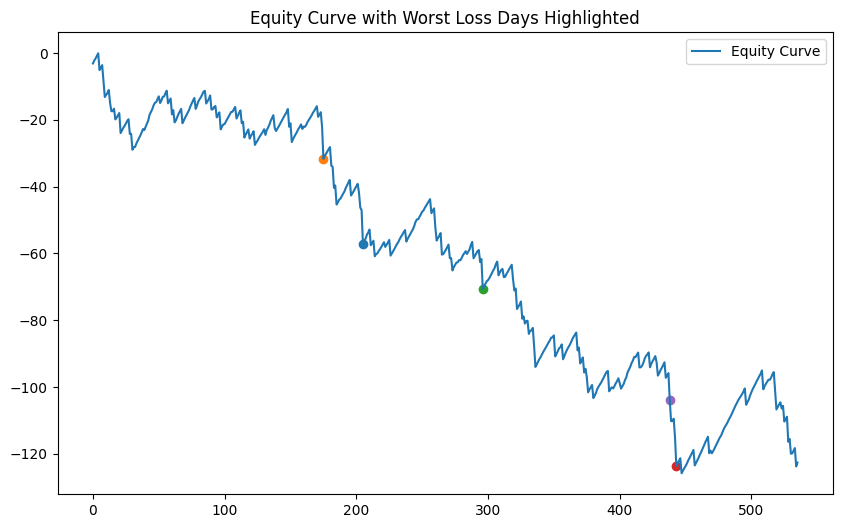

In [33]:
worst_days = sorted_returns.head(5).index

plt.figure(figsize=(10,6))
plt.plot(equity.index, equity.values, label="Equity Curve")

for idx in worst_days:
    plt.scatter(idx, equity.loc[idx], marker='o')

plt.title("Equity Curve with Worst Loss Days Highlighted")
plt.legend()
plt.show()

## Remove 5-10 Worst Losses and Recompute Expectancy

In [34]:
remove_5 = trade_totals.drop(trade_totals.nsmallest(5, 'value').index)

print('mean return: ', remove_5['value'].mean())
print('std return: ', remove_5['value'].std())
print('median return: ', remove_5['value'].median())
print('---')

avg_win = remove_5[remove_5['value'] > 0]['value'].mean()
print('avg win: ', avg_win)
print('largest win: ', remove_5['value'].max())
print('-----')
avg_loss = remove_5[remove_5['value'] <= 0]['value'].mean()
print('avg loss: ', avg_loss)
print('largest loss: ', remove_5['value'].min())
print('---')
expectancy = (win_rate * avg_win) + ((1.0 - win_rate) * avg_loss)
print('expectancy: ', expectancy)

mean return:  -0.14642184557438795
std return:  1.9760992648977473
median return:  0.7000000000000001
---
avg win:  0.7435446009389671
largest win:  1.7000000000000002
-----
avg loss:  -3.757142857142857
largest loss:  -7.500000000000002
---
expectancy:  -0.1801039445628998


In [35]:
remove_10 = trade_totals.drop(trade_totals.nsmallest(10, 'value').index)

print('mean return: ', remove_10['value'].mean())
print('std return: ', remove_10['value'].std())
print('median return: ', remove_10['value'].median())
print('---')
avg_win = remove_10[remove_10['value'] > 0]['value'].mean()
print('avg win: ', avg_win)
print('largest win: ', remove_10['value'].max())
print('---')
avg_loss = remove_10[remove_10['value'] <= 0]['value'].mean()
print('avg loss: ', avg_loss)
print('largest loss: ', remove_10['value'].min())
print('---')
expectancy = (win_rate * avg_win) + ((1.0 - win_rate) * avg_loss)
print('expectancy: ', expectancy)

mean return:  -0.08526615969581751
std return:  1.8820648805868427
median return:  0.7000000000000001
---
avg win:  0.7435446009389671
largest win:  1.7000000000000002
---
avg loss:  -3.616
largest loss:  -6.25
---
expectancy:  -0.15113805970149252


## SPX Range

In [36]:
spx = pd.read_csv('../data/VIX_daily_2022-2025.csv', header=0)
spx['range'] = spx['high'] - spx['low']
spx['date'] = pd.to_datetime(spx['date']).dt.date
spx.head()

,date,open,high,low,close,volume,range
0,2022-03-31,19.68,21.48,19.54,20.56,0,1.94
1,2022-04-01,20.62,20.86,19.41,19.63,0,1.45
2,2022-04-04,20.75,20.78,18.45,18.57,0,2.33
3,2022-04-05,18.79,21.57,18.55,21.03,0,3.02
4,2022-04-06,21.27,24.78,21.24,22.10,0,3.54


In [37]:
trade_totals['date'] = pd.to_datetime(trade_totals['exit time']).dt.date
trade_totals.head()

,exit time,value,month,date
trade,,,,
0,2022-04-06 09:45:00-04:00,-3.10,2022-04,2022-04-06
1,2022-04-08 10:35:00-04:00,0.90,2022-04,2022-04-08
2,2022-04-13 09:35:00-04:00,0.60,2022-04,2022-04-13
3,2022-04-14 11:15:00-04:00,0.80,2022-04,2022-04-14
4,2022-04-20 09:45:00-04:00,0.75,2022-04,2022-04-20


In [38]:
win_range_mean = trade_totals.merge(spx, on='date', how='left').drop(columns=['volume']).nlargest(50, 'value')['range'].mean()
print('win range mean: ', win_range_mean)
loss_range_mean = trade_totals.merge(spx, on='date', how='left').drop(columns=['volume']).nsmallest(50, 'value')['range'].mean()
print('loss range mean: ', loss_range_mean)

win range mean:  1.9749999999999996
loss range mean:  2.8613999999999997


In [39]:
trade_totals = trade_totals.merge(spx, on='date', how='left').drop(columns=['volume'])
wins = trade_totals[trade_totals['value'] > 0.0]
losses = trade_totals[trade_totals['value'] <= 0.0]
print('win range mean: ', wins['range'].mean())
print('loss range mean: ', losses['range'].mean())

win range mean:  1.6233333333333333
loss range mean:  2.3822727272727273


In [40]:
trade_totals.head()

,exit time,value,month,date,open,high,low,close,range
0,2022-04-06 09:45:00-04:00,-3.10,2022-04,2022-04-06,21.27,24.78,21.24,22.10,3.54
1,2022-04-08 10:35:00-04:00,0.90,2022-04,2022-04-08,21.25,22.34,20.28,21.16,2.06
2,2022-04-13 09:35:00-04:00,0.60,2022-04,2022-04-13,23.52,24.45,21.37,21.82,3.08
3,2022-04-14 11:15:00-04:00,0.80,2022-04,2022-04-14,21.72,22.70,20.85,22.70,1.85
4,2022-04-20 09:45:00-04:00,0.75,2022-04,2022-04-20,21.13,21.32,19.75,20.32,1.57


In [41]:
trade_totals['range_bucket'] = pd.qcut(trade_totals['range'], q=20)

In [42]:
bucket_stats = trade_totals.groupby('range_bucket').agg(
    count=('value', 'count'),
    win_rate=('value', lambda x: (x > 0).mean()),
    avg_pnl=('value', 'mean'),
    avg_range=('range', 'mean')
)

/var/folders/8_/wzdkmfn13sd6lvk4c6xz3cph0000gp/T/ipykernel_45721/2901097718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = trade_totals.groupby('range_bucket').agg(


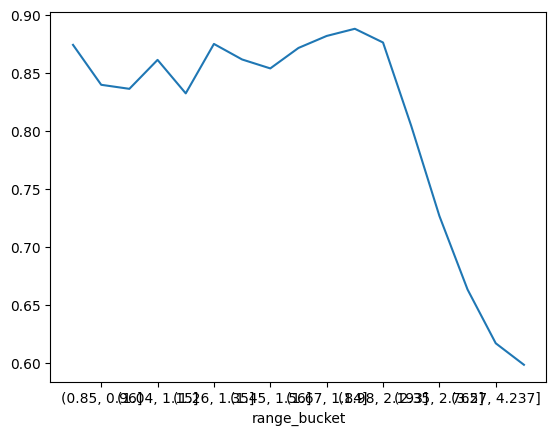

In [43]:
ax = bucket_stats['win_rate'].rolling(4).mean().plot()

## Exit Conditions

In [44]:
trade_totals['exit reason'] = 'not set'

In [45]:
prof_target_mask = (trade_totals['exit time'].dt.hour < 12) & (trade_totals['value'] > 0.0)
loss_target_mask = (trade_totals['exit time'].dt.hour < 13) & (trade_totals['value'] <= 0.0)
afternoon_prof_mask = (trade_totals['exit time'].dt.hour >= 12) & (trade_totals['exit time'].dt.hour < 13) & (trade_totals['value'] > 0.0)
forced_exit_mask = (trade_totals['exit time'].dt.hour >= 13)

In [46]:
exit_hours = trade_totals['exit time'].dt.hour

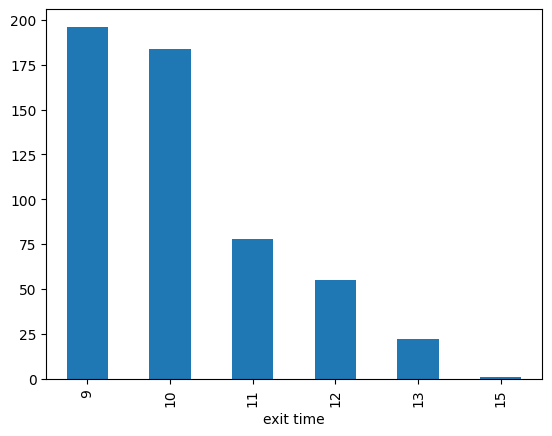

In [47]:
ax = exit_hours.value_counts().plot(kind='bar')

In [48]:
trade_totals.loc[prof_target_mask, 'exit reason'] = 'prof_target_reached'
trade_totals.loc[loss_target_mask, 'exit reason'] = 'max_loss'
trade_totals.loc[afternoon_prof_mask, 'exit reason'] = 'afternoon_prof'
trade_totals.loc[forced_exit_mask, 'exit reason'] = 'forced_exit'

exit reason
prof_target_reached    382
max_loss                89
afternoon_prof          42
forced_exit             23
Name: count, dtype: int64


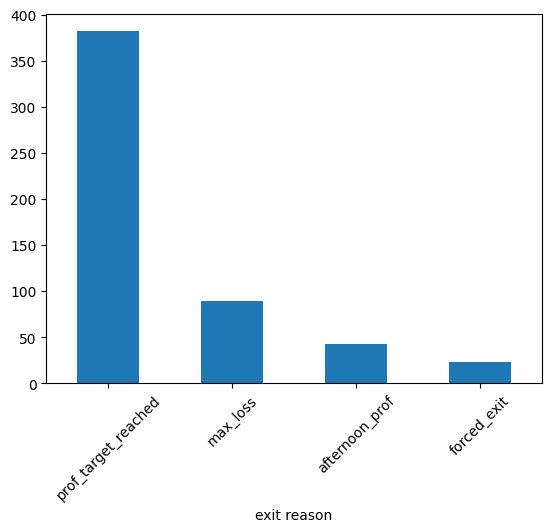

In [49]:
ax = trade_totals['exit reason'].value_counts().plot(kind='bar',rot=45)
print(trade_totals['exit reason'].value_counts())

In [231]:
print('prof target range avg: ', trade_totals[trade_totals['exit reason'] == 'prof_target_reached']['range'].mean())
print('max loss range avg: ', trade_totals[trade_totals['exit reason'] == 'max_loss']['range'].mean())
print('afternoon prof range avg: ', trade_totals[trade_totals['exit reason'] == 'afternoon_prof']['range'].mean())
print('forced exit range avg: ', trade_totals[trade_totals['exit reason'] == 'forced_exit']['range'].mean())

prof target range avg:  1.5689005235602091
max loss range avg:  2.508426966292135
afternoon prof range avg:  2.0185714285714282
forced exit range avg:  2.0104347826086952


In [234]:
trade_totals[trade_totals['exit reason'] == 'forced_exit'].nsmallest(10, 'value')

,exit time,value,month,date,exit reason,open,high,low,close,range,range_bucket
13,2022-05-26 13:00:00-04:00,-3.85,2022-05,2022-05-26,forced_exit,28.42,28.46,27.11,27.50,1.35,"(1.35, 1.45]"
202,2023-09-14 13:00:00-04:00,-2.55,2023-09,2023-09-14,forced_exit,13.39,13.46,12.79,12.82,0.67,"(0.665, 0.75]"
375,2024-11-05 13:00:00-05:00,-2.50,2024-11,2024-11-05,forced_exit,21.98,22.06,20.20,20.49,1.86,"(1.84, 1.98]"
14,2022-05-27 13:00:00-04:00,-2.50,2022-05,2022-05-27,forced_exit,27.50,27.54,25.57,25.72,1.97,"(1.84, 1.98]"
312,2024-06-05 13:00:00-04:00,-2.45,2024-06,2024-06-05,forced_exit,13.14,13.25,12.60,12.63,0.65,"(0.537, 0.665]"
328,2024-07-26 13:00:00-04:00,-2.15,2024-07,2024-07-26,forced_exit,17.97,18.05,16.37,16.39,1.68,"(1.67, 1.84]"
51,2022-09-09 13:00:00-04:00,-2.00,2022-09,2022-09-09,forced_exit,23.49,23.57,22.64,22.79,0.93,"(0.85, 0.96]"
428,2025-03-14 13:00:00-04:00,-1.85,2025-03,2025-03-14,forced_exit,24.35,24.36,21.48,21.77,2.88,"(2.765, 3.27]"
523,2025-10-22 13:00:00-04:00,-1.85,2025-10,2025-10-22,forced_exit,17.84,21.01,17.73,18.60,3.28,"(3.27, 4.237]"
131,2023-03-15 13:00:00-04:00,-1.70,2023-03,2023-03-15,forced_exit,23.21,29.91,23.19,26.14,6.72,"(4.237, 15.62]"


In [233]:
trade_totals[trade_totals['exit reason'] == 'max_loss'].nsmallest(10, 'value')

,exit time,value,month,date,exit reason,open,high,low,close,range,range_bucket
205,2023-09-21 09:35:00-04:00,-10.00,2023-09,2023-09-21,max_loss,15.49,17.54,15.10,17.54,2.44,"(2.35, 2.765]"
175,2023-07-06 09:35:00-04:00,-9.50,2023-07,2023-07-06,max_loss,14.85,17.08,14.79,15.44,2.29,"(2.193, 2.35]"
296,2024-04-25 09:35:00-04:00,-8.90,2024-04,2024-04-25,max_loss,16.25,17.55,15.27,15.37,2.28,"(2.193, 2.35]"
443,2025-04-23 09:35:00-04:00,-8.45,2025-04,2025-04-23,max_loss,28.75,30.29,27.11,28.45,3.18,"(2.765, 3.27]"
438,2025-04-03 09:35:00-04:00,-8.05,2025-04,2025-04-03,max_loss,26.38,30.02,24.93,30.02,5.09,"(4.237, 15.62]"
528,2025-11-04 09:35:00-05:00,-7.50,2025-11,2025-11-04,max_loss,19.73,20.48,17.90,19.00,2.58,"(2.35, 2.765]"
265,2024-02-22 09:50:00-05:00,-6.45,2024-02,2024-02-22,max_loss,14.28,14.64,14.12,14.54,0.52,"(0.259, 0.537]"
439,2025-04-04 09:35:00-04:00,-6.35,2025-04,2025-04-04,max_loss,30.12,45.61,29.99,45.31,15.62,"(4.237, 15.62]"
183,2023-08-02 09:35:00-04:00,-6.30,2023-08,2023-08-02,max_loss,15.70,16.48,14.95,16.09,1.53,"(1.45, 1.56]"
351,2024-09-19 09:35:00-04:00,-6.30,2024-09,2024-09-19,max_loss,17.21,17.27,16.21,16.33,1.06,"(1.04, 1.15]"


## Hypotheses
- [ ] The 60% take-profit cap compresses the right tail enough to prevent the strategy from compensating for medium-sized losses.
- [ ] The stop-loss rule amplifies convex losses and makes expectancy worse than holding to expiration
- [ ] The strategy is inherently fragile to high intraday range regardless of stop logic.

## Notes & Findings

- "rare convex shock dominates long-run theta"
- This strategy is not failing because it leaks a little every day. It is failing because a small subset of trades overwhelms the cumulative gains.
- "The relationship between intraday range and win rate is not linear. Instead, the strategy exhibits a regime shift: above a critical realized range threshold, win probability collapses."
- 5% of trades account for >100% of total losses, i.e. 5% of trades dominate total losses
- The worst losses are exclusively max-loss exits.
- Win rate collapses once intraday range crosses a threshold.
- Max-loss exits occur on the highest intraday range days. Loss days have materially higher realized range.
- 80% of trades hit profit target.




## Todos
- [x] Remove the worst 5 trades. Recompute expectancy. If expectancy becomes clearly positive, then your failure mode is: "Unhedged convex exposure to rare but inevitable regime shifts." If expectancy remains weak or near zero even after removing the worst 5–10 trades, then your structure is flawed more deeply
- [x] Look at the intraday SPX range on the worst 10 trades. If they correspond to extreme realized range days, then your mechanism is gamma exposure to realized volatility spikes.
- [ ] Need to confirm: The baseline strategy’s losses are highly concentrated: 5% of trades account for more than 100% of total losses. The strategy’s negative performance is therefore dominated by convex tail exposure rather than persistent small negative expectancy.
- [ ] Bucket trades into range quintiles. Compute win rate and average P&L per bucket.

## PHASE 1 — Basic Distributional Anatomy
1. Compute core trade statistics
    * Mean return per trade
    * Median return
    * Standard deviation
    - Win rate
    - Average win
    - Average loss
    - Largest win / largest loss
    - Skewness and kurtosis
2.	Plot trade return histogram. You want to visually confirm tail shape and asymmetry.
3.	Compute percentile table
    - 1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99% This helps quantify tail thickness.
4.	Compute expectancy decomposition

Expectancy = (win_rate × avg_win) – (loss_rate × avg_loss)

Determine which term is dominating failure.

**Goal of Phase 1** Identify the empirical payoff profile. Is this small-wins/rare-blowups? Or persistent bleed?

## PHASE 2 — Loss Concentration & Tail Contribution
1. Rank trades by P&L (worst to best)
2.	Compute cumulative P&L contribution of worst:
    * 1 trade
    * 5 trades
    * 10 trades
    * 1% of trades
    * 5% of trades
3.	Compute drawdown episodes
    - Max drawdown
    - Duration of top 3 drawdowns
    - % of total loss attributable to worst drawdown
4.	Plot equity curve and highlight worst loss days.

Goal of Phase 2: Determine whether performance is structurally broken or dominated by extreme events.

## PHASE 3 — Exit-Type Diagnostics
1.	Group trades by exit reason:
    * 60% profit
    * x3 stop
    * Time exit (profitable after noon)
    * Hard 1pm exit
3.	For each exit type compute:
    - Count
    - Win rate
    - Average P&L
    - Total P&L contribution
    - Std deviation
4.	Check transition dynamics:
    - What % of trades hit stop before noon?
    - What % hit profit target early vs late?

Goal of Phase 3: Identify whether a specific exit rule is structurally responsible for failure.

## PHASE 4 — Intraday Path Dependence (Critical for 1DTE)
1.	For each losing trade, record:
    - ~~Time stop-loss was triggered~~
    - ~~Intraday high-low range of SPX that day~~
    - ~~Maximum adverse excursion (MAE)~~
    - ~~Maximum favorable excursion (MFE)~~
2.	Compare:
    - ~~MAE distribution of winners vs losers~~
    - ~~MFE of losers (did they almost win before reversing?)~~
3.	~~Stratify by time-of-day:~~
    - Losses before 11am
    - 11am–1pm
    - After 1pm

Goal of Phase 4: Determine whether gamma exposure + early trend drives failure.

## PHASE 5 — Temporal Structure
1.	Monthly performance breakdown:
    - Mean trade return per month
    - trades per month
    - Monthly P&L
2.	Identify worst 3 months and inspect trade distribution inside them.
3.	Compute rolling 30-trade expectancy.
4.	Check serial correlation of trade returns:
    - Lag-1 autocorrelation
    - Conditional expectation after large loss

Goal of Phase 5: Determine regime sensitivity without using external variables.

## PHASE 6 — Structural Questions

After all computation, explicitly answer:
* Is failure driven by rare catastrophic days or persistent negative expectancy?
* Is stop-loss asymmetry mathematically fatal?
* Does time exit leak edge?
* Does intraday range explain most losses?
* Are losses clustered in regime shifts?

Do not move to exogenous variables (VIX, term structure) until you can clearly articulate at least 3 structural failure mechanisms purely from this endogenous decomposition.

If done properly, this alone is enough material for a serious first post.